In [31]:
import pandas as pd
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
# plt.rcParams['font.serif']=['Microsoft JhengHei'] #用来正常显示中文标签

In [32]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\users\\asus\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [33]:
dataPath = '../data/'
# filenameList = [f'109_{i}.csv' for i in range(1, 13) if isfile(f'{dataPath}109_{i}.csv')]  # data names
filenameList = ['109.csv']
# filenameList

In [34]:
data = pd.DataFrame()
for fn in filenameList:
    df = pd.read_csv(dataPath + fn, index_col= 0, delimiter=',')
    data = df.drop(columns=['main', 'text'])
    display(data)

,place,judge,fine,imprison,again,alcohol,education,vehicle
0,雲林,雲林張文俊,0,90,0,0.500,Not Found,自用小客車
1,雲林,雲林張文俊,0,120,0,1.195,Not Found,Not Found
2,苗栗,苗栗胡文傑,0,90,0,0.570,Not Found,自用小客車
3,苗栗,苗栗胡文傑,0,90,0,0.430,Not Found,普通重型機車
4,花蓮,花蓮梁昭銘,0,90,0,0.470,Not Found,Not Found
...,...,...,...,...,...,...,...,...
2368,臺中,臺中黃凡瑄,0,90,0,0.250,Not Found,自用小貨車
2369,臺中,臺中黃凡瑄,10000,60,0,0.680,高中,普通重型機車
2370,臺中,臺中陳怡君,0,90,0,0.320,Not Found,普通重型機車
2371,臺中,臺中李怡真,5000,150,1,1.110,Not Found,自用小客車


<AxesSubplot:>

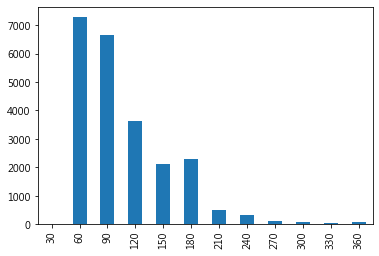

In [25]:
# target
# print(set(data['imprison']))
data['imprison'].value_counts(sort=False).sort_index().plot.bar()

In [ ]:
# place vs target
print(set(data['place']))
df = data[['place', 'imprison']]
df.boxplot(by='place', figsize=(15, 8), fontsize=15, rot=90)

In [ ]:
# judge vs target
df = data[['place', 'judge', 'imprison']]
for sub in df.groupby('place'):
    print(set(sub[1]['judge']))
    print(len(set(sub[1]['judge'])))
    sub[1].boxplot(by='judge', figsize=(15, 8), fontsize=15, rot=90)
    plt.show()

{0, 1}


<AxesSubplot:title={'center':'imprison'}, xlabel='[again]'>

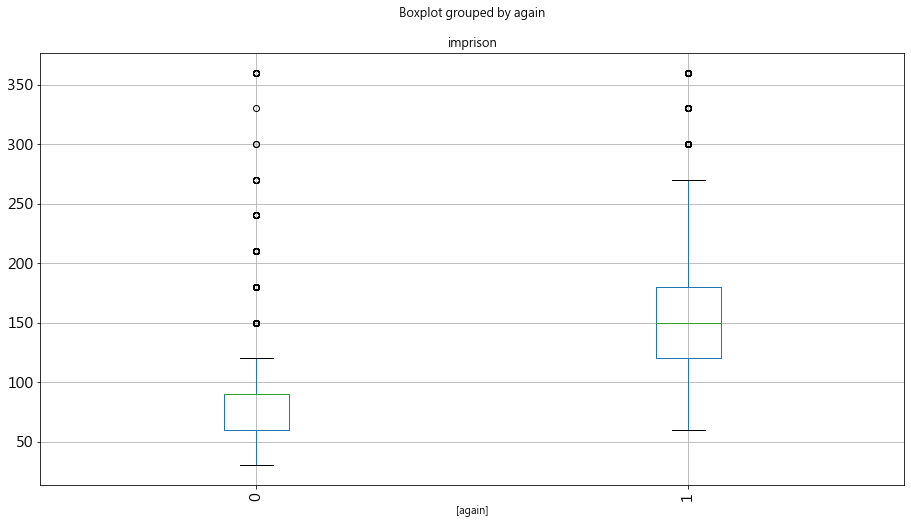

In [27]:
# again vs target
print(set(data['again']))
df = data[['again', 'imprison']]
df.boxplot(by='again', figsize=(15, 8), fontsize=15, rot=90)

count    23095.000000
mean         0.556795
std          0.290767
min          0.150000
25%          0.330000
50%          0.470000
75%          0.710000
max          1.990000
Name: alcohol, dtype: float64

<AxesSubplot:title={'center':'alcohol'}, xlabel='[imprison]'>

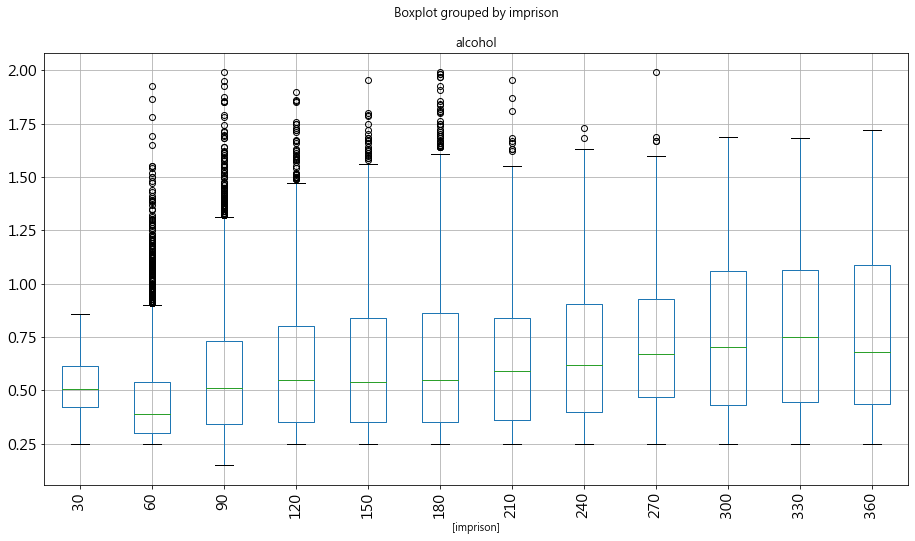

In [37]:
# alcohol vs target
display(data['alcohol'].describe())
df = data[['alcohol', 'imprison']]
# df = df.sort_values(by='alcohol')
# df.plot(x='alcohol', y='imprison', figsize=(15, 8), marker='.')
df.boxplot(by='imprison', figsize=(15, 8), fontsize=15, rot=90)

count    23095.000000
mean         0.556795
std          0.290767
min          0.150000
25%          0.330000
50%          0.470000
75%          0.710000
max          1.990000
Name: alcohol, dtype: float64

<AxesSubplot:title={'center':'alcohol'}, xlabel='[imprison]'>

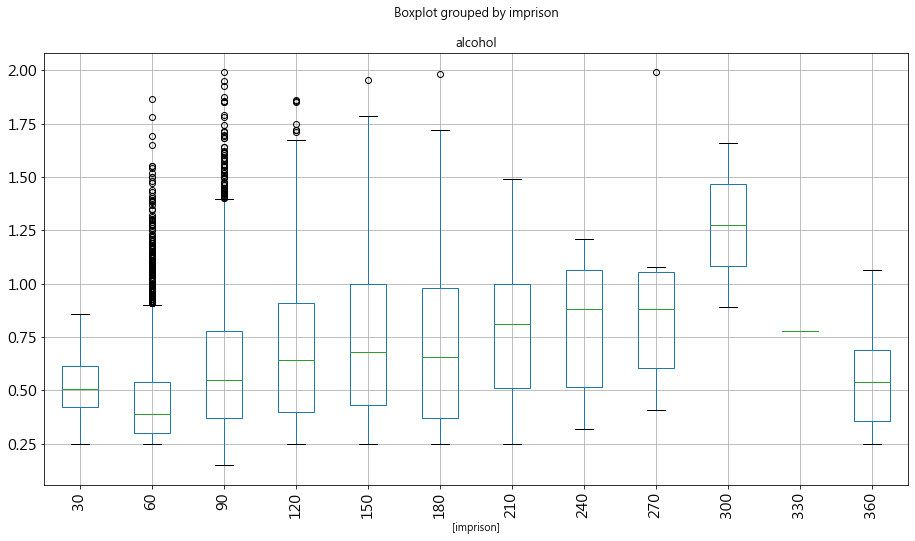

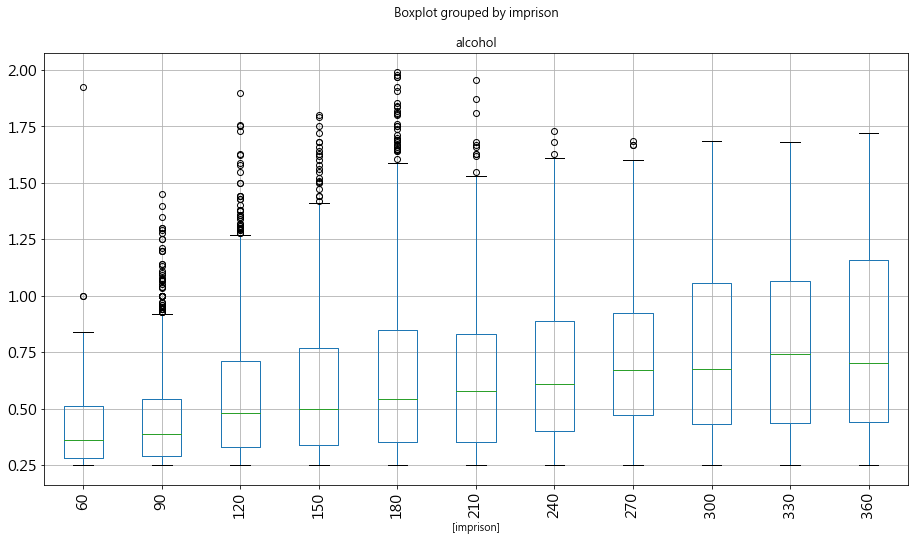

In [42]:
# alcohol and again vs target
display(data['alcohol'].describe())
df = data[data['again'] == 0]
df[['alcohol', 'imprison']].boxplot(by='imprison', figsize=(15, 8), fontsize=15, rot=90)

df = data[data['again'] == 1]
df[['alcohol', 'imprison']].boxplot(by='imprison', figsize=(15, 8), fontsize=15, rot=90)

{'大學', '高中', '研究所以上', '國中', 'Not Found'}


<AxesSubplot:title={'center':'imprison'}, xlabel='[education]'>

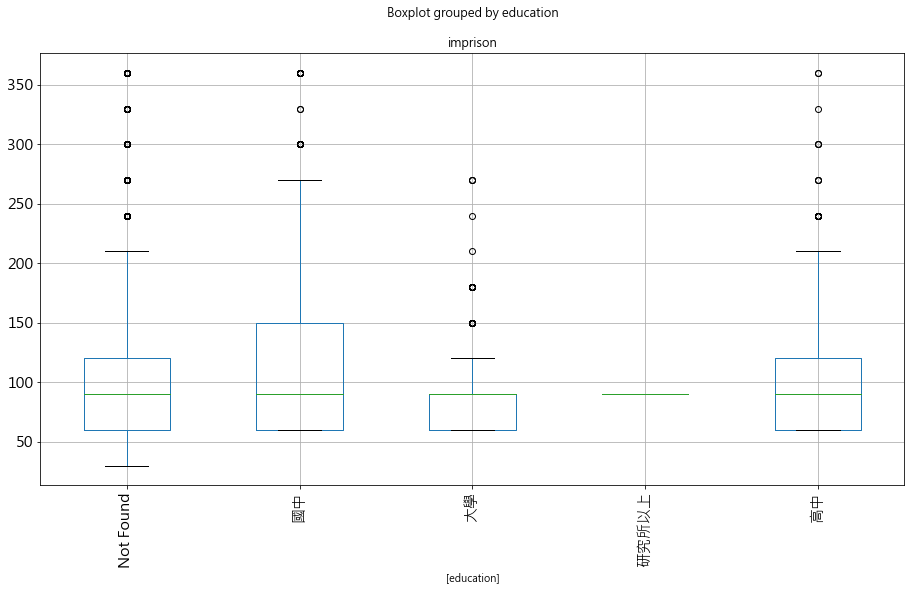

In [38]:
# education vs target
print(set(data['education']))
df = data[['education', 'imprison']]
df.boxplot(by='education', figsize=(15, 8), fontsize=15, rot=90)

{'遊覽大客車', '營業貨櫃曳引車', '自用大貨車', '普通重型機車', '營業小貨車', '營業大貨車', '自用小貨車', '租賃小客車', '自用大客車', '營業大客車', 'Not Found', '租賃小貨車', '大型重型機車', '自用小客車', '營業小客車', '交通車'}


<AxesSubplot:title={'center':'imprison'}, xlabel='[vehicle]'>

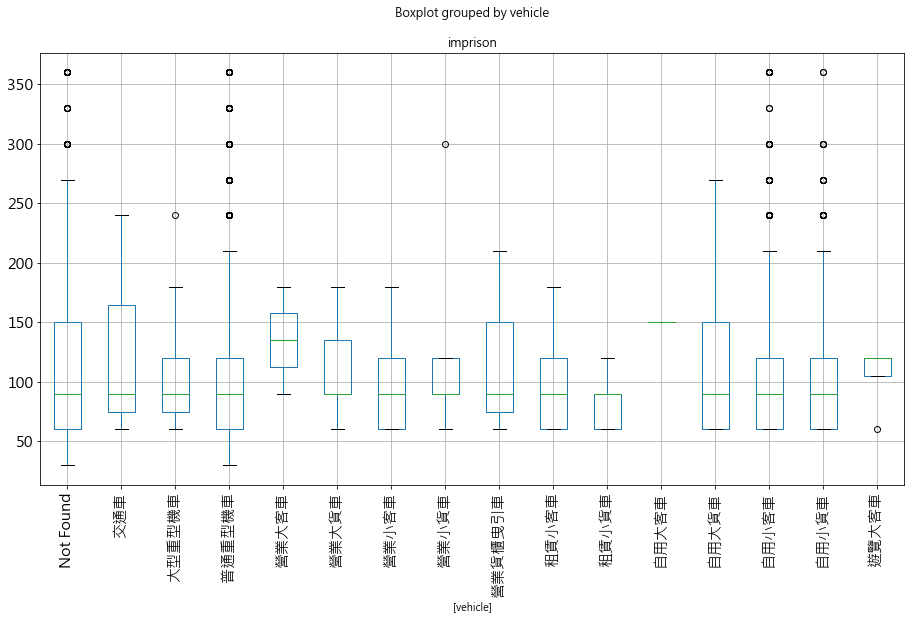

In [41]:
# vehicle vs target
print(set(data['vehicle']))
df = data[['vehicle', 'imprison']]
df.boxplot(by='vehicle', figsize=(15, 8), fontsize=15, rot=90)

{0, 80000, 5000, 10000, 90000, 15000, 20000, 100000, 4000, 25000, 30000, 14000, 3000, 35000, 120000, 40000, 8000, 200000, 45000, 50000, 2000, 18000, 7000, 55000, 60000, 12000, 150000, 6000, 70000}


<AxesSubplot:title={'center':'imprison'}, xlabel='[fine]'>

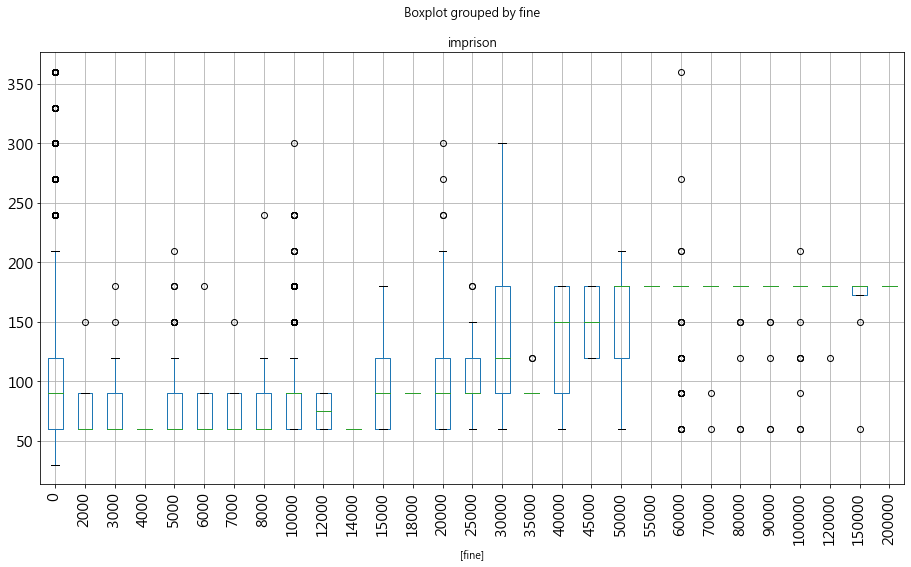

In [43]:
# fine vs target
print(set(data['fine']))
df = data[['fine', 'imprison']]
df.boxplot(by='fine', figsize=(15, 8), fontsize=15, rot=90)